In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
def show(image, cmap='gray'):
    plt.imshow(image, cmap=cmap)
    plt.show()
    
def export(imagename):
    cv2.imwrite(imagename+".jpg", eval(imagename))

In [50]:
# bastian = cv2.cvtColor(cv2.imread("img/bastian.png"), cv2.COLOR_BGR2RGB)
# bastian_triggered = cv2.cvtColor(cv2.imread("img/bastian_triggered.png"), cv2.COLOR_BGR2RGB)

# bastian = cv2.resize(bastian, (600,600))
# bastian_triggered = cv2.resize(bastian_triggered, (600,600))

inch_cm = 2.54
target_DPI = 300
sheet_LPI = 50
image_PPI = target_DPI / sheet_LPI
views_N = 2
striped_pixels = image_PPI / views_N

In [59]:
striped_pixels

3.0

In [52]:
# anjachris = cv2.cvtColor(cv2.imread("img/AnjaChris_cropped.png"), cv2.COLOR_BGR2RGB)
# mirigio = cv2.cvtColor(cv2.imread("img/MiriGio_cropped.png"), cv2.COLOR_BGR2RGB)

# anjachris = cv2.resize(anjachris, (1181, 1772))
# mirigio = cv2.resize(mirigio, (1181, 1772))

In [53]:
test_width = int(0.2 * target_DPI) # 0.1 inches
test_length = int(1 * target_DPI) # 1 inch

black_sheet = 0*np.ones((test_width, test_length, 3))
white_sheet = 255*np.ones((test_width, test_length, 3))

In [54]:
# a1 = cv2.cvtColor(cv2.imread("img/Apple_1.png"), cv2.COLOR_BGR2RGB)
# a2 = cv2.cvtColor(cv2.imread("img/Apple_2.png"), cv2.COLOR_BGR2RGB)

In [55]:
# aspect_ratio = black_sheet.shape[1] / black_sheet.shape[0]
# new_size = (int(target_DPI * 4 * aspect_ratio), target_DPI * 4)

# black_sheet = cv2.resize(black_sheet, new_size)
# white_sheet = cv2.resize(white_sheet, new_size)

In [69]:
def interlace2v(image1, image2, vertical=True, lpi=40, dpi=300):
    stripe_pixels = dpi / lpi / 2
    
    if vertical==False: # i.e. horizontal==True
        image1 = image1.transpose((1,0,2))
        image2 = image2.transpose((1,0,2))
        
    image_size = image1.shape[:2]
    if image2.shape[:2] != image_size:
        print("Image sizes don't match.")
        return None
        
    mask1 = np.tile((np.arange(image_size[0]) // stripe_pixels) % 2, (image_size[1],1)).T
    mask2 = np.absolute(mask1 - 1)

    image_output = image1 * mask1[:,:,np.newaxis] + image2 * mask2[:,:,np.newaxis]

    if vertical == False:
        image_output = image_output.transpose((1,0,2))

    return image_output.astype("int")

In [73]:
bw_interlaced = interlace2v(black_sheet, white_sheet, lpi=75, vertical=False)

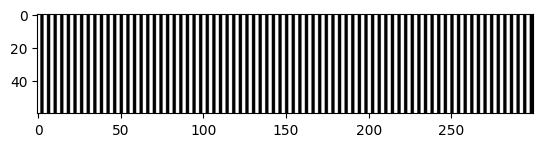

In [74]:
plt.imshow(bw_interlaced)

In [75]:
cv2.imwrite("img/bw_interlaced_horizontal.png", cv2.cvtColor(np.float32(bw_interlaced), cv2.COLOR_BGR2RGB))

True